# Utilisation de modules, de bibliothèques

## Exploration d'un jeu de données

### Statistiques simples

Commençons par importer les bibliothèques qui nous seront nécessaires :

In [3]:
import pandas as pd # bibliothèques dédiée au traitement de jeux de données
import matplotlib.pyplot as plt # bibliothèque graphique
import seaborn as sns # bibliothèque graphique reposant sur matplotlib et dédiée plus particulièrement à la représentation de jeux de données
import numpy as np # bibliothèque puissante permettant de gérer des tableaux multidimensionnels
import plotly.express as px # libraire permettant des graphes interactifs
import plotly.graph_objects as go # complémentaire à la première

In [4]:
# paramètres par défaut pour le graphes
plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 13
sns.set_style("white")

Le jeu de données est issu du [World Happiness report](https://worldhappiness.report) (une publication annuelle de l'ONU mesurant le degrés de bonheur de la population mondiale par pays à partir de sondages).

In [5]:
url = "https://raw.githubusercontent.com/Info-TSI-Vieljeux/s1-tp3/main/2020.csv"
data_monde = pd.read_csv(url,sep=";",index_col=0) # data_monde est une dataframe Pandas

Une dataframe est une sorte de dictionnaire dont les clés sont les en-têtes des colonnes et dont les lignes sont indexées.

In [6]:
data_monde

Région du monde  Score de bonheur  \
Pays                                                             
Finland                       Western Europe            7.8087   
Denmark                       Western Europe            7.6456   
Switzerland                   Western Europe            7.5599   
Iceland                       Western Europe            7.5045   
Norway                        Western Europe            7.4880   
...                                      ...               ...   
Central African Republic  Sub-Saharan Africa            3.4759   
Rwanda                    Sub-Saharan Africa            3.3123   
Zimbabwe                  Sub-Saharan Africa            3.2992   
South Sudan               Sub-Saharan Africa            2.8166   
Afghanistan                       South Asia            2.5669   

                          déviation standard  PIB par habitant (log)  \
Pays                                                                   
Finland                             0.031156               10.639267   
Denmark                             0.033492               10.774001   
Switzerland                         0.035014               10.979933   
Iceland                             0.059616               10.772559   
Norway                              0.034837               11.087804   
...                                      ...                     ...   
Central African Republic            0.115183                6.625160   
Rwanda                              0.052425                7.600104   
Zimbabwe                            0.058674                7.865712   
South Sudan                         0.107610                7.425360   
Afghanistan                         0.031311                7.462861   

                          Entraide sociale  Espérance de vie en bonne santé  \
Pays                                                                          
Finland                           0.954330                        71.900825   
Denmark                           0.955991                        72.402504   
Switzerland                       0.942847                        74.102448   
Iceland                           0.974670                        73.000000   
Norway                            0.952487                        73.200783   
...                                    ...                              ...   
Central African Republic          0.319460                        45.200001   
Rwanda                            0.540835                        61.098846   
Zimbabwe                          0.763093                        55.617260   
South Sudan                       0.553707                        51.000000   
Afghanistan                       0.470367                        52.590000   

                          Liberté des choix de vie  Générosité  \
Pays                                                             
Finland                                   0.949172   -0.059482   
Denmark                                   0.951444    0.066202   
Switzerland                               0.921337    0.105911   
Iceland                                   0.948892    0.246944   
Norway                                    0.955750    0.134533   
...                                            ...         ...   
Central African Republic                  0.640881    0.082410   
Rwanda                                    0.900589    0.055484   
Zimbabwe                                  0.711458   -0.072064   
South Sudan                               0.451314    0.016519   
Afghanistan                               0.396573   -0.096429   

                          Corruption perçue  Score de bonheur en Distopie  
Pays                                                                       
Finland                            0.195445                      1.972317  
Denmark                            0.168489                      1.972317  
Switzerland                        0.30372

Précisions sur ces données :
- le score de bonheur est un score sur 10 correspondant à la moyenne des réponses des sondés (0 correspond à la pire vie possible et 10 à la meilleure)
- ce n'est pas le PIB par habitant mais son logarithme qui est utilisé pour ne pas avoir des valeurs sur des ordres de grandeur trop différents d'une colonne à l'autre
- entraide sociale : moyenne des réponses à la question binaire "en cas de difficultés, pouvez-vous compter sur de la famille ou des amis pour vous aider ?" (0 : non, 1 : oui)
- liberté des choix de vie : moyenne des réponses à la question binaire "êtes-vous satisfait ou non de votre liberté à choisir ce que vous voulez faire de votre vie ?" (0 : non, 1 : oui)
- générosité : moyenne des réponses à "Avez-vous donné à une association caritative le mois dernier ?" ajustée par rapport au PIB par habitant (valeur résiduelle)
- corruption perçue : moyenne des réponses à la question binaire "la corruption est-elle répandue dans le gouvernement ?" (0 : non, 1 : oui)

On simplifie un peu le jeu de données en retirant la colonne 'Déviation standard' et 'Score de bonheur en distopie' (score minimal obtenu).

In [7]:
data_monde.drop(columns=['déviation standard','Score de bonheur en Distopie'], inplace=True)
data_monde.head(3)

Région du monde  Score de bonheur  PIB par habitant (log)  \
Pays                                                                    
Finland      Western Europe            7.8087               10.639267   
Denmark      Western Europe            7.6456               10.774001   
Switzerland  Western Europe            7.5599               10.979933   

             Entraide sociale  Espérance de vie en bonne santé  \
Pays                                                             
Finland              0.954330                        71.900825   
Denmark              0.955991                        72.402504   
Switzerland          0.942847                        74.102448   

             Liberté des choix de vie  Générosité  Corruption perçue  
Pays                                                                  
Finland                      0.949172   -0.059482           0.195445  
Denmark                      0.951444    0.066202           0.168489  
Switzerland                  0.921337    0.105911           0.303728

In [6]:
data_monde.tail(3)

Région du monde  Score de bonheur  PIB par habitant (log)  \
Pays                                                                        
Zimbabwe     Sub-Saharan Africa            3.2992                7.865712   
South Sudan  Sub-Saharan Africa            2.8166                7.425360   
Afghanistan          South Asia            2.5669                7.462861   

             Entraide sociale  Espérance de vie en bonne santé  \
Pays                                                             
Zimbabwe             0.763093                         55.61726   
South Sudan          0.553707                         51.00000   
Afghanistan          0.470367                         52.59000   

             Liberté des choix de vie  Générosité  Corruption perçue  
Pays                                                                  
Zimbabwe                     0.711458   -0.072064           0.810237  
South Sudan                  0.451314    0.016519           0.763417  
Afghanistan                  0.396573   -0.096429           0.933687

Traçons un histogramme brut du jeu de données complet pour y voir plus clair (la librairie Seaborn rend cela très simple).

<AxesSubplot:ylabel='Count'>

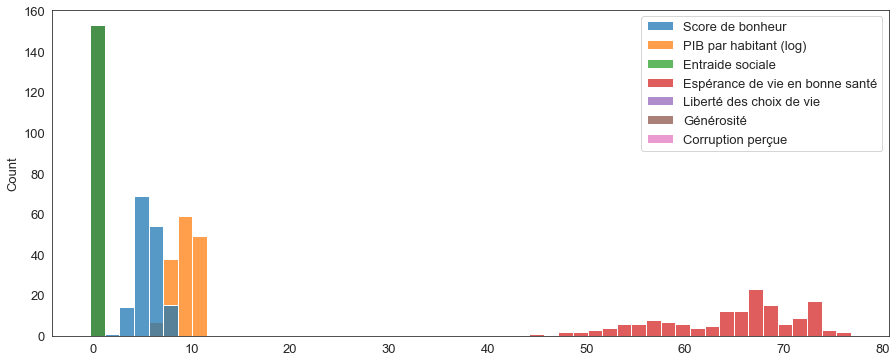

In [7]:
sns.histplot(data=data_monde)

La méthode `describe` s'appliquant à des dataframe pandas retourne un résumé statistique très pratique des données de chaque colonne :

In [8]:
data_monde.describe()

Score de bonheur  PIB par habitant (log)  Entraide sociale  \
count         153.00000              153.000000        153.000000   
mean            5.47324                9.295706          0.808721   
std             1.11227                1.201588          0.121453   
min             2.56690                6.492642          0.319460   
25%             4.72410                8.350645          0.737217   
50%             5.51500                9.456313          0.829204   
75%             6.22850               10.265124          0.906747   
max             7.80870               11.450681          0.974670   

       Espérance de vie en bonne santé  Liberté des choix de vie  Générosité  \
count                       153.000000                153.000000  153.000000   
mean                         64.445529                  0.783360   -0.014568   
std                           7.057848                  0.117786    0.151809   
min                          45.200001                  0.396573   -0.300907   
25%                          58.961712                  0.714839   -0.127015   
50%                          66.305145                  0.799805   -0.033665   
75%                          69.289192                  0.877709    0.085429   
max                          76.804581                  0.974998    0.560664   

       Corruption perçue  
count         153.000000  
mean            0.733120  
std             0.175172  
min             0.109784  
25%             0.683019  
50%             0.783122  
75%             0.849151  
max             0.935585

Pour confirmer certaines des valeurs, vous allez construire différentes fonctions : 
- une fonction `decompte` qui retourne le nombre d'éléments d'une liste,
- une fonction `moyenne` qui retourne la moyenne des éléments d'une liste,
- une fonction `mediane` qui retourne la médiane des éléments d'une liste triée en ordre croissant.

L'utilisation de fonctions statistiques déjà existantes est bien sûr prohibée.

In [9]:
def decompte(L) :
    """
    decompte(L:liste)->entier
    """
    ### BEGIN SOLUTION
    return len(L)
    ### END SOLUTION
    
def moyenne(L) :
    """
    decompte(L:liste)->flottant
    """
    ### BEGIN SOLUTION
    s = 0
    for e in L :
        s += e
    return s/len(L)
    ### END SOLUTION
    
def mediane(L) :
    """
    decompte(L:liste)->floattant ou entier (suivant les valeurs de L)
    """
    ### BEGIN SOLUTION
    N = decompte(L)
    return L[N//2]
    ### END SOLUTION

In [10]:
# Cellule de vérification (ne pas modifier)
### BEGIN HIDDEN TESTS
import statistics
import inspect
Liste_score = list(data_monde['Score de bonheur'])[::-1]
assert decompte(Liste_score) == 153, "erreur dans le décompte"
### END HIDDEN TESTS

In [70]:
# Cellule de vérification (ne pas modifier)
### BEGIN HIDDEN TESTS
import statistics
import inspect
Liste_score = list(data_monde['Score de bonheur'])[::-1]
assert moyenne(Liste_score) == sum(Liste_score) / len(Liste_score), "erreur dans le calcul de la moyenne"
assert 'mean(' not in inspect.getsource(moyenne), "pas le droit d'utiliser de fonction dédiée (mean)"
assert 'sum(' not in inspect.getsource(moyenne), "pas le droit d'utiliser de fonction dédiée (sum)"
### END HIDDEN TESTS

In [71]:
# Cellule de vérification (ne pas modifier)
### BEGIN HIDDEN TESTS
import statistics
import inspect
Liste_score = list(data_monde['Score de bonheur'])[::-1]
assert mediane(Liste_score) == statistics.median(Liste_score), "erreur dans le calcul de la médiane"
assert 'median(' not in inspect.getsource(mediane), "pas le droit d'utiliser de fonction dédiée (mean)"
### END HIDDEN TESTS

Vous pouvez tester vos fonctions sur la liste `Liste_score` ci-dessous et comparer aux résultats du tableau résumé :

In [9]:
# cellule de travail
Liste_scores = list(data_monde['Score de bonheur'])


Calculez dans les cellules suivantes, pour les 3 formes d'importation du module, la déviation standard des éléments de la liste `Liste_scores` en utilisant la fonction `stdev` du module `statistics`.<br>
Il s'agit d'évaluer directement l'expresion (le nombre dois s'afficher sous la cellule sans utiliser de `print`).

In [13]:
# première forme d'importation
import statistics
### BEGIN SOLUTION
statistics.stdev(Liste_scores)
### END SOLUTION

1.112270173678083

In [14]:
# Cellule de vérification (ne pas modifier)
### BEGIN HIDDEN TESTS
assert str(_) == '1.112270173678083'
### END HIDDEN TESTS

In [15]:
# deuxième forme d'importation
from statistics import *
# Rq : on évite le plus souvent ce type d'importation qui peut générer des conflits de définition.
### BEGIN SOLUTION
stdev(Liste_scores)
### END SOLUTION

1.112270173678083

In [16]:
# Cellule de vérification (ne pas modifier)
### BEGIN HIDDEN TESTS
assert str(_) == '1.112270173678083'
### END HIDDEN TESTS

In [89]:
# troisième forme d'importation
import statistics as st
# C'est la forme la plus pratique si le module est souvent utilisé
### BEGIN SOLUTION
st.stdev(Liste_scores)
### END SOLUTION

1.112270173678083

In [90]:
# Cellule de vérification (ne pas modifier)
### BEGIN HIDDEN TESTS
assert str(_) == '1.112270173678083'
### END HIDDEN TESTS

Tracons maintenant un diagramme en batons des scores de bonheur des 60 premiers pays.

Text(0.5, 0, '')

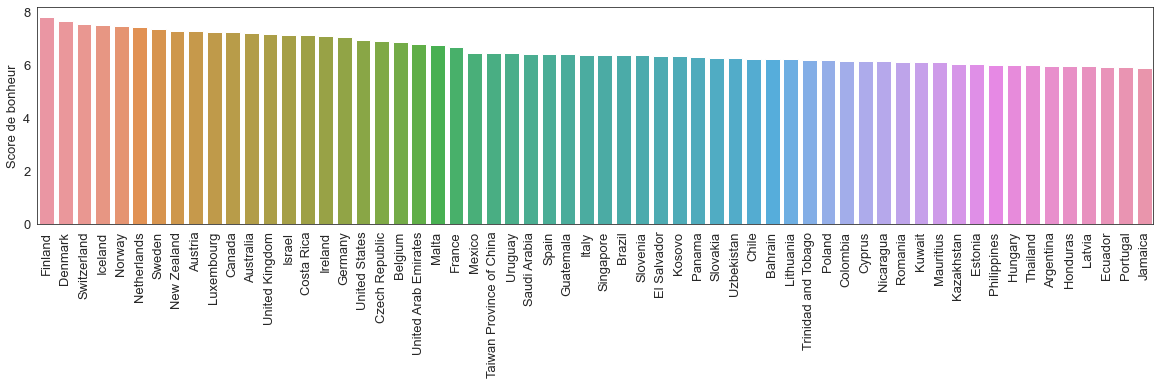

In [10]:
fig,ax = plt.subplots(figsize=(20,4))
sns.barplot(ax = ax,x = data_monde.index[:60], y = data_monde['Score de bonheur'].head(60))
plt.xticks(rotation=90)
ax.set_xlabel('')

On remarque que les pays sont classés par score de bonheur décroissant dans le jeu de données d'origine.<br>
Mais on peut évidemment choisir un autre critère de classement si on le désire :

In [11]:
data_monde.sort_values(by="PIB par habitant (log)",ascending=True).head(10)

Région du monde  Score de bonheur  \
Pays                                                             
Burundi                   Sub-Saharan Africa            3.7753   
Central African Republic  Sub-Saharan Africa            3.4759   
Congo (Kinshasa)          Sub-Saharan Africa            4.3110   
Niger                     Sub-Saharan Africa            4.9096   
Liberia                   Sub-Saharan Africa            4.5579   
Malawi                    Sub-Saharan Africa            3.5380   
Mozambique                Sub-Saharan Africa            4.6236   
Sierra Leone              Sub-Saharan Africa            3.9264   
Madagascar                Sub-Saharan Africa            4.1656   
Gambia                    Sub-Saharan Africa            4.7506   

                          PIB par habitant (log)  Entraide sociale  \
Pays                                                                 
Burundi                                 6.492642          0.490326   
Central African Republic                6.625160          0.319460   
Congo (Kinshasa)                        6.694256          0.672159   
Niger                                   6.842167          0.617435   
Liberia                                 7.054380          0.709281   
Malawi                                  7.062226          0.544007   
Mozambique                              7.069346          0.723874   
Sierra Leone                            7.268803          0.636142   
Madagascar                              7.281686          0.668196   
Gambia                                  7.321815          0.693169   

                          Espérance de vie en bonne santé  \
Pays                                                        
Burundi                                         53.400002   
Central African Republic                        45.200001   
Congo (Kinshasa)                                52.900002   
Niger                                           53.500095   
Liberia                                         56.096313   
Malawi                                          57.592888   
Mozambique                                      54.205822   
Sierra Leone                                    50.865143   
Madagascar                                      59.105427   
Gambia                                          55.012016   

                          Liberté des choix de vie  Générosité  \
Pays                                                             
Burundi                                   0.626350   -0.017552   
Central African Republic                  0.640881    0.082410   
Congo (Kinshasa)                          0.700794    0.083638   
Niger                                     0.759772    0.013861   
Liberia                                   0.735269    0.042273   
Malawi                                    0.803223    0.021433   
Mozambique                                0.864452    0.032376   
Sierra Leone                              0.715315    0.088661   
Madagascar                                0.557574   -0.011824   
Gambia                                    0.733163    0.343199   

                          Corruption perçue  
Pays                                         
Burundi                            0.606935  
Central African Republic           0.891807  
Congo (Kinshasa)                   0.809404  
Niger                              0.722530  
Liberia                            0.856376  
Malawi                             0.731701  
Mozambique                         0.683019  
Sierra Leone                       0.861331  
Madagascar                         0.817486  
Gambia                             0.690718

In [12]:
data_monde.sort_values(by="Corruption perçue",ascending=False).head()

Région du monde  Score de bonheur  \
Pays                                                                   
Bulgaria                Central and Eastern Europe            5.1015   
Romania                 Central and Eastern Europe            6.1237   
Bosnia and Herzegovina  Central and Eastern Europe            5.6741   
Afghanistan                             South Asia            2.5669   
Kosovo                  Central and Eastern Europe            6.3252   

                        PIB par habitant (log)  Entraide sociale  \
Pays                                                               
Bulgaria                              9.869319          0.937840   
Romania                              10.107584          0.825162   
Bosnia and Herzegovina                9.455817          0.829204   
Afghanistan                           7.462861          0.470367   
Kosovo                                9.204430          0.820727   

                        Espérance de vie en bonne santé  \
Pays                                                      
Bulgaria                                      66.803978   
Romania                                       67.207237   
Bosnia and Herzegovina                        67.808136   
Afghanistan                                   52.590000   
Kosovo                                        63.885555   

                        Liberté des choix de vie  Générosité  \
Pays                                                           
Bulgaria                                0.745178   -0.143908   
Romania                                 0.842823   -0.197815   
Bosnia and Herzegovina                  0.651353    0.098275   
Afghanistan                             0.396573   -0.096429   
Kosovo                                  0.861536    0.190934   

                        Corruption perçue  
Pays                                       
Bulgaria                         0.935585  
Romania                          0.934300  
Bosnia and Herzegovina           0.933769  
Afghanistan                      0.933687  
Kosovo                           0.922328

In [13]:
data_monde.sort_values(by="Générosité",ascending=False).iloc[[45]]

Région du monde  Score de bonheur  PIB par habitant (log)  \
Pays                                                                
Denmark  Western Europe            7.6456               10.774001   

         Entraide sociale  Espérance de vie en bonne santé  \
Pays                                                         
Denmark          0.955991                        72.402504   

         Liberté des choix de vie  Générosité  Corruption perçue  
Pays                                                              
Denmark                  0.951444    0.066202           0.168489

D'après la cellule précédente, le 46<sup>e</sup> (le 1<sup>er</sup> est à l'indice 0) meilleur score de générosité appartient au Danemark.

Quel pays correspond à la 59<sup>e</sup> plus courte espérance de vie en bonne santé ?

In [23]:
# Cellule de travail


In [24]:
# Remplacer 'France' par la bonne réponse (garder l'orthographe anglaise identique au jeu de données)
nom_pays = 'France'

In [ ]:
# Cellule de vérification (ne pas modifier)
### BEGIN HIDDEN TESTS
assert nom_pays == 'Russia' or nom_pays == 'russia'
### END HIDDEN TESTS

On peut aussi aisément filtrer le jeu de données en fonction de n'importe quel critère :

In [17]:
data_monde[(data_monde["Espérance de vie en bonne santé"]>60) & (data_monde["Espérance de vie en bonne santé"]<61)]
# Rq : pandas nécessite les opérateurs logiques bit à bit '&' (et) et '|' (ou) 
# plutôt que les opérateurs élément par élément 'and' et 'or' qui lèveraient une erreur.

Région du monde  Score de bonheur  PIB par habitant (log)  \
Pays                                                                  
Kenya  Sub-Saharan Africa            4.5830                8.029776   
India          South Asia            3.5733                8.849824   

       Entraide sociale  Espérance de vie en bonne santé  \
Pays                                                       
Kenya          0.702652                        60.096931   
India          0.592201                        60.215187   

       Liberté des choix de vie  Générosité  Corruption perçue  
Pays                                                            
Kenya                  0.829748    0.294682           0.831499  
India                  0.881445    0.057552           0.772043

Quel pays possède un score de bonheur inférieur à 5 malgré une valeur de corruption perçue inférieure à 0.5 ?

In [93]:
# Remplacer 'France' par la bonne réponse (garder l'orthographe anglaise identique au jeu de données)
nom_pays = 'France'

In [ ]:
# Cellule de vérification (ne pas modifier)
### BEGIN HIDDEN TESTS
assert nom_pays == 'Rwanda' or nom_pays == 'rwanda'
### END HIDDEN TESTS

Pour chaque variable mesurée (chaque colonne), on peut facilement tracer des histogrammes illustrant la répartition des valeurs.

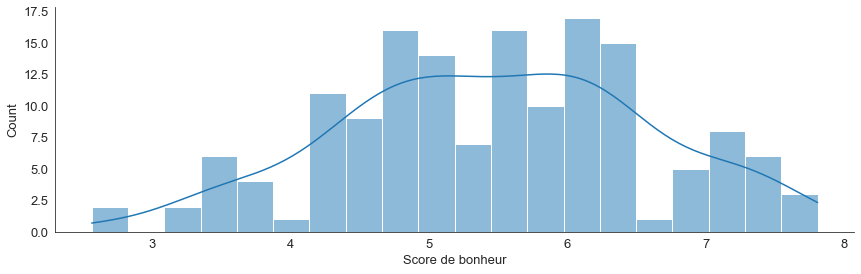

In [18]:
sns.displot(data_monde, x="Score de bonheur", bins=20,  kde=True, height=4, aspect=3)
# bins contrôle le nombre de classes

On peut aussi tirer profit de l'interactivité pour obtenir les informations voulues directement en survolant le graphe.

On utilise pour cela la bibliothèque `Plotly express` qui sait (comme seaborn) parler à une dataframe pandas.<br>
On peut zoomer sur ces graphiques interactifs et obtenir des informations en survolant avec le curseur.

In [14]:
px.histogram(data_monde,'Corruption perçue',nbins=40,title="Corruption perçue")
# Cette fois-ci, le nombre de classes est désigné par nbins.

Modifez le graphe précedent pour répondre à cette question : combien la classe la plus peuplée de l'histogramme de l'espérence de vie en bonne santé compte-elle de valeurs si l'histogramme comporte 30 classes ?

In [ ]:
# notez votre réponse (sous la forme d'un entier)
nb_valeurs =

In [ ]:
# Cellule de vérification (ne pas modifier)
### BEGIN HIDDEN TESTS
nb_valeurs == 29
### END HIDDEN TESTS

On peut aussi récupérer les données d'un pays en particulier :

In [20]:
data_monde.loc['France']

Région du monde                    Western Europe
Score de bonheur                           6.6638
PIB par habitant (log)                  10.584223
Entraide sociale                         0.937104
Espérance de vie en bonne santé         73.801933
Liberté des choix de vie                 0.825468
Générosité                              -0.130642
Corruption perçue                        0.583521
Name: France, dtype: object

### Regroupement des données

On remarque que le jeu de données contient une colonne catégorielle : "Région du monde".<br> Cela va nous permettre d'explorer de possibles dynamiques régionales : est-ce que les pays d'une même zone ont des indicateurs semblables ?

In [21]:
pd.unique(data_monde["Région du monde"]) # permet d'afficher une seule fois chacune des valeurs différentes de la colonne

array(['Western Europe', 'North America and ANZ',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Central and Eastern Europe', 'East Asia', 'Southeast Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia'], dtype=object)

Traçons des diagrammes en boîte à moustaches représentant les scores de bonheur pour chacune des régions.<br>
À nouveau Seaborn rend cela très simple...

Text(0, 0.5, '')

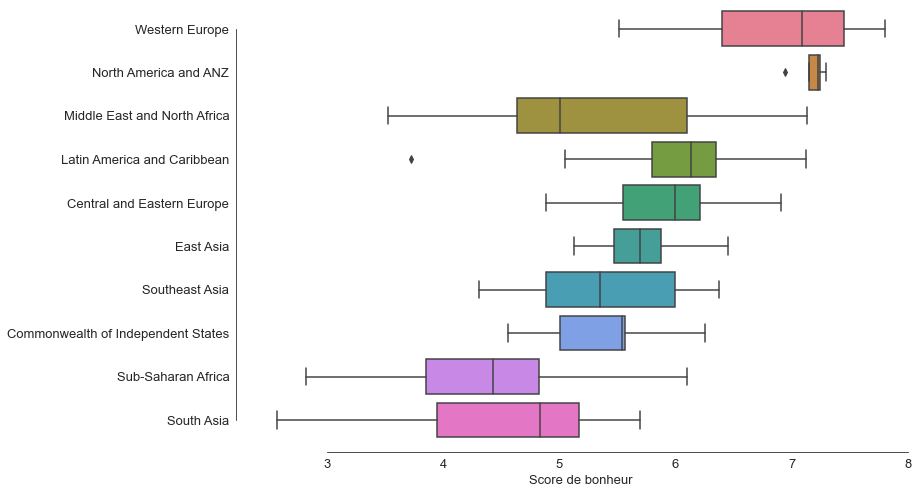

In [22]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(ax = ax, x="Score de bonheur", y="Région du monde", palette="husl", data=data_monde)
sns.despine(offset=10, trim=True)
ax.set_ylabel('')

Traçons maintenant un graphe plus général représentant toutes les relations possibles entre deux axes du jeu de données pour voir si certaines combinaisons discriminent plus nettement les différentes régions.

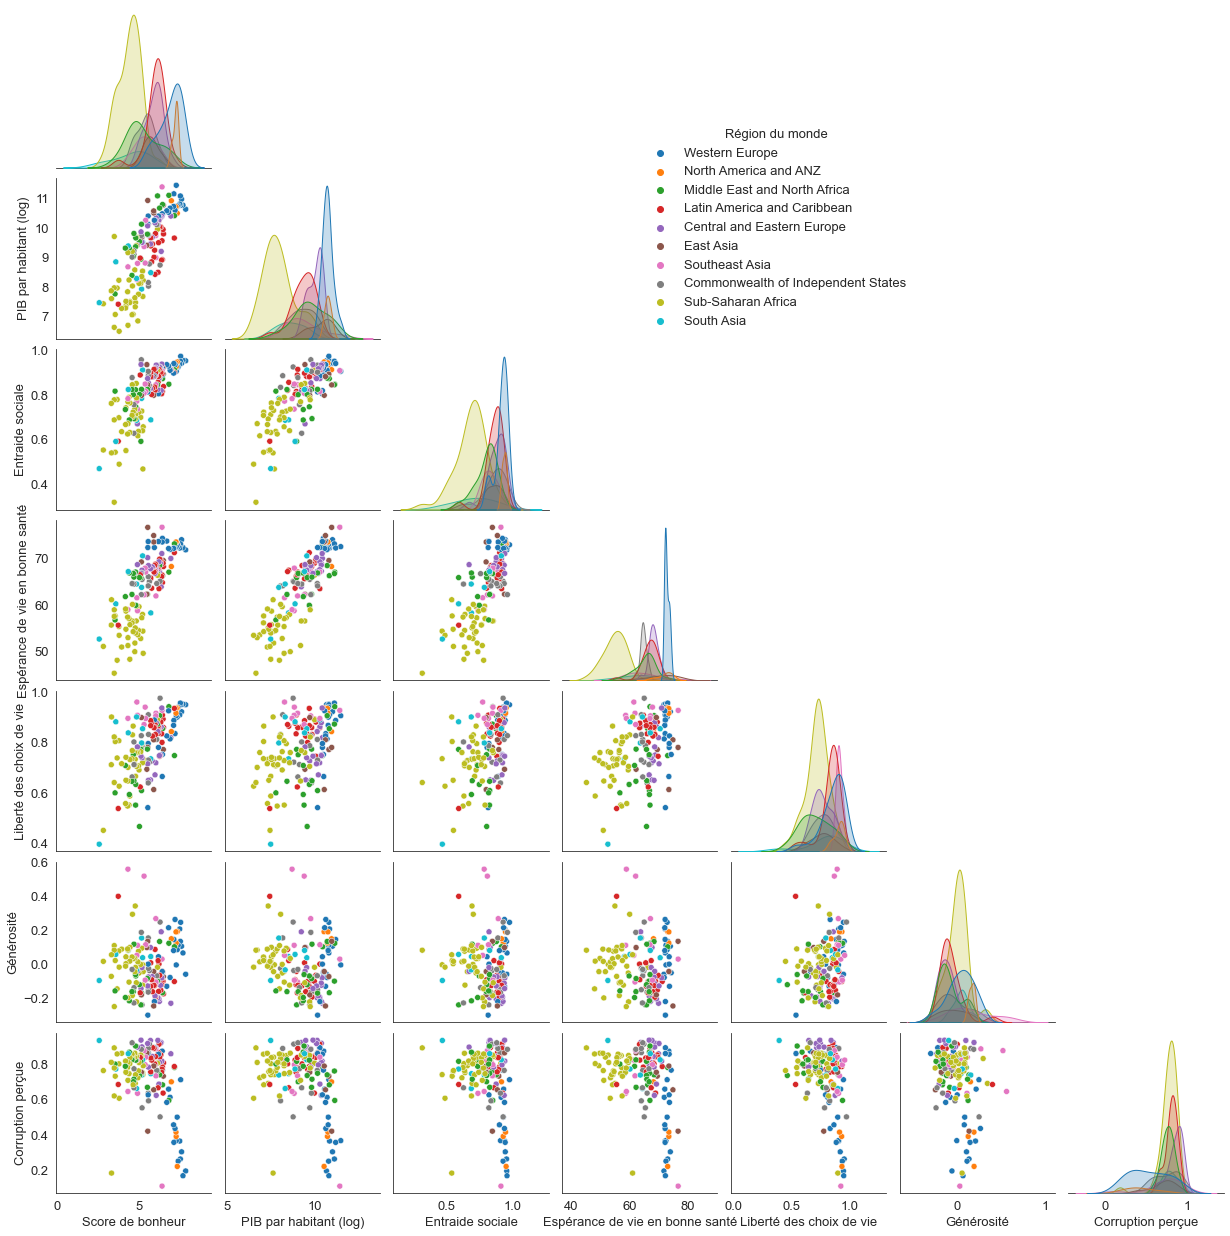

In [23]:
# Un peu long à s'exécuter (environ 30 s)
g = sns.pairplot(data_monde, hue="Région du monde", corner=True)
g._legend.set_bbox_to_anchor((0.6, 0.8))

On constate que les groupes régionaux sont relativement homogènes pour la plupart des critères.

Zoomons sur un de ces graphes :

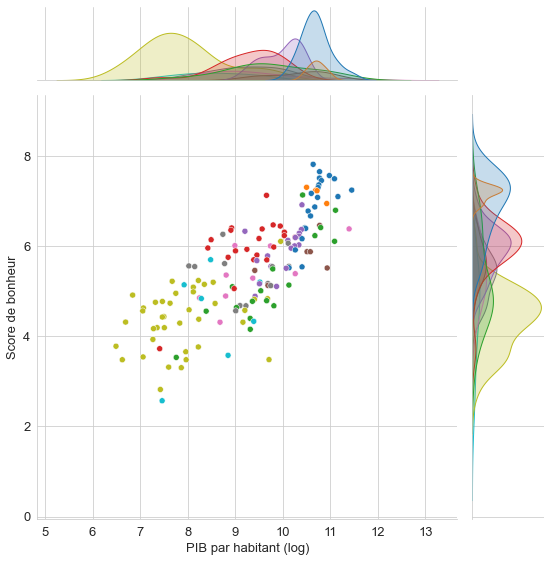

In [25]:
sns.set_style("whitegrid")
sns.jointplot(data=data_monde,x="PIB par habitant (log)", y="Score de bonheur", hue="Région du monde", kind='scatter', height=8, legend=False)

Une version interactive du même graphique permet de consulter les informations pour chaque point :

In [15]:
px.scatter(data_monde,x='PIB par habitant (log)', y='Score de bonheur', hover_name=data_monde.index, color='Région du monde')

Trouver la région du monde représentée sur le graphe suivant.
<img src="http://cordier-phychi.toile-libre.org/Info/images/graphemystere.png" width="600"/>

In [36]:
# notez votre réponse ci-dessous sous la forme d'une chaîne de caractères identique à celles du jeu de données
région = '...'

In [ ]:
# Cellule de vérification (ne pas modifier)
### BEGIN HIDDEN TESTS
assert région == pd.unique(data_monde["Région du monde"])[3]
### END HIDDEN TESTS

Allons maintenant au-delà de la proximité géographique pour regrouper les pays en 3 grands blocs socioéconomiques : "Nord", "Sud", "Intermédiaire".

In [8]:
conditions = [(data_monde['Région du monde'] == 'Western Europe') | (data_monde['Région du monde'] == 'North America and ANZ'),(data_monde['Région du monde'] == 'South Asia') | (data_monde['Région du monde'] == 'Sub-Saharan Africa')]
choix = ['"Nord"', '"Sud"']
data_monde['Groupe'] = np.select(conditions, choix, default='Autres')
deux_gpes = data_monde[data_monde["Groupe"].isin(['"Nord"','"Sud"'])]

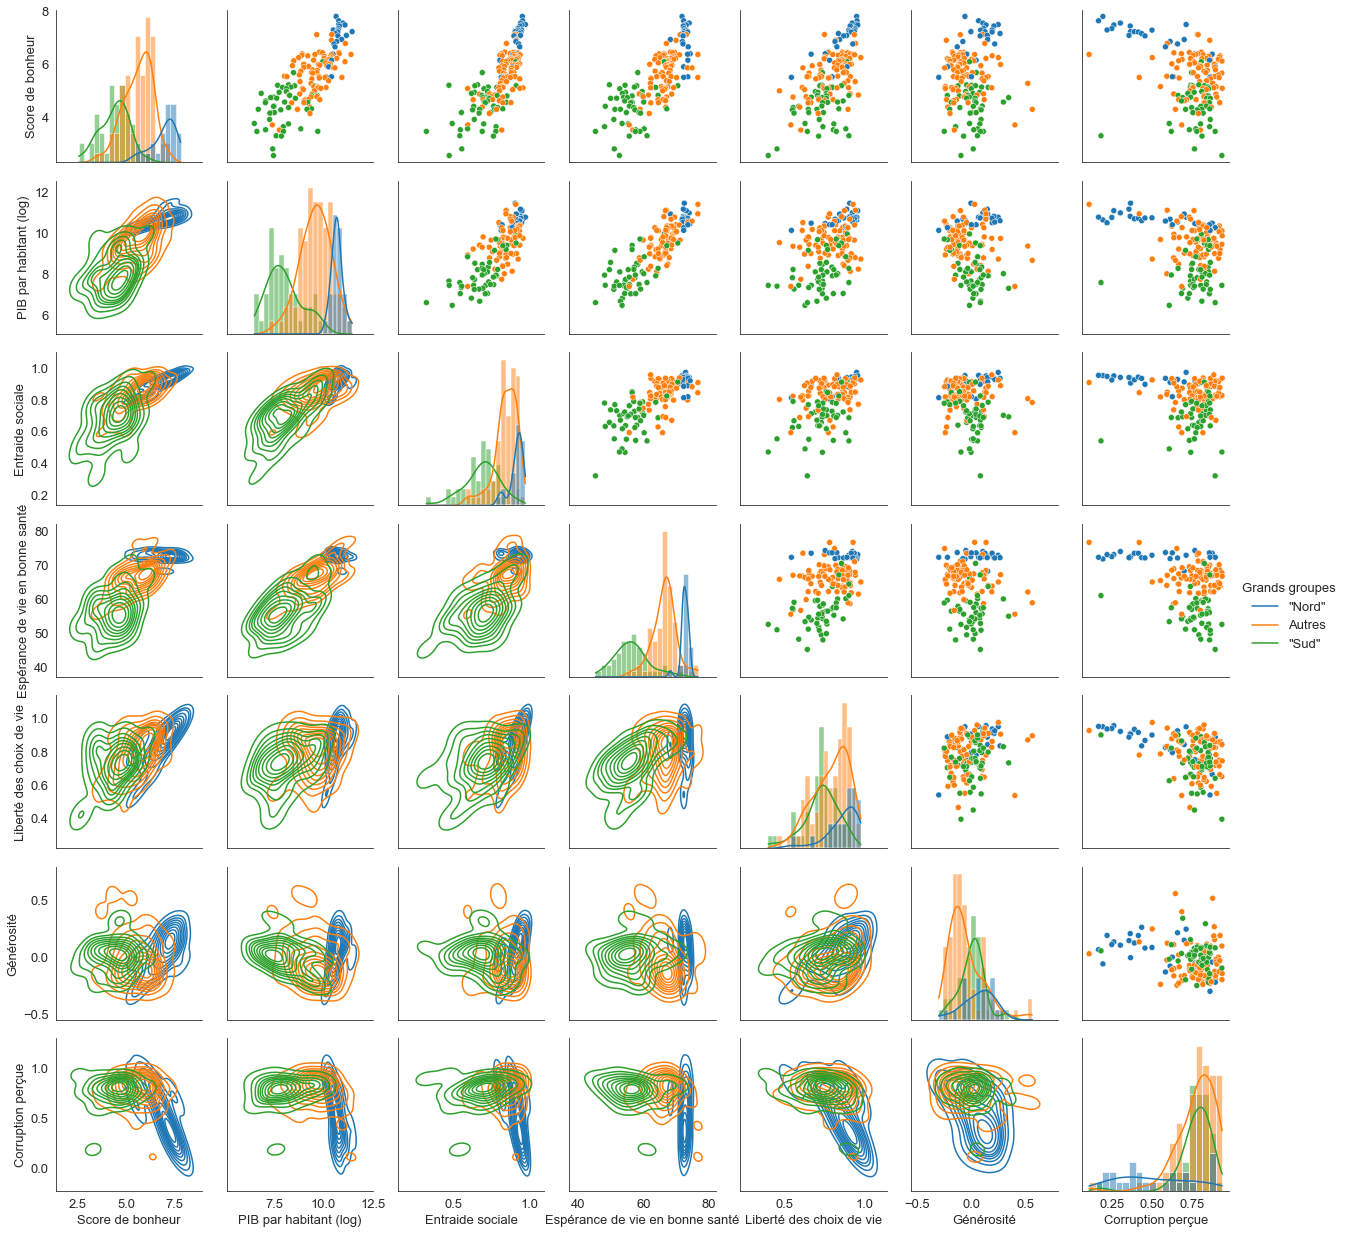

In [10]:
# Un peu long à s'exécuter (environ 30 s)
sns.set_style("white")
g = sns.PairGrid(data_monde, diag_sharey=False, hue="Groupe")
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot,common_norm=False)
g.map_diag(sns.histplot,bins=20,kde=True)
g.add_legend(title="Grands groupes",adjust_subtitles=True)

À nouveau, l'homogénéité de ces 3 groupes saute aux yeux.

### Corrélations

Les graphiques précédents mettent en évidence des corrélations assez fortes entre certaines grandeurs.<br>
Creusons un peu.

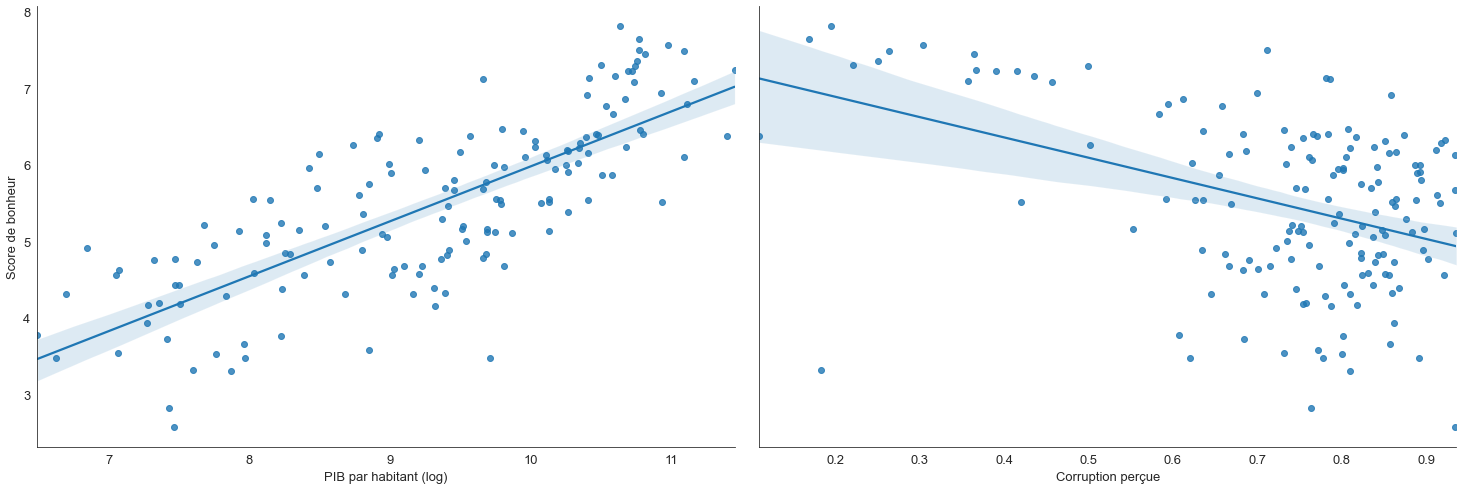

In [24]:
g = sns.PairGrid(data_monde, y_vars=["Score de bonheur"], x_vars=["PIB par habitant (log)", "Corruption perçue"], height=7, aspect=1.5)
g.map(sns.regplot)

On constate sur cet exemple que le score de bonheur est corrélé positivement avec le PIB par habitant et négativement avec le degré de corruption perçue.

Pour avoir un panorama complet, traçons la matrice de corrélation donnant, pour chaque couple de variable, la valeur du coefficient de corrélation $r$ (valeur entre -1 et 1 traduisant le degré de dépendance linéaire entre deux variables) :

<AxesSubplot:>

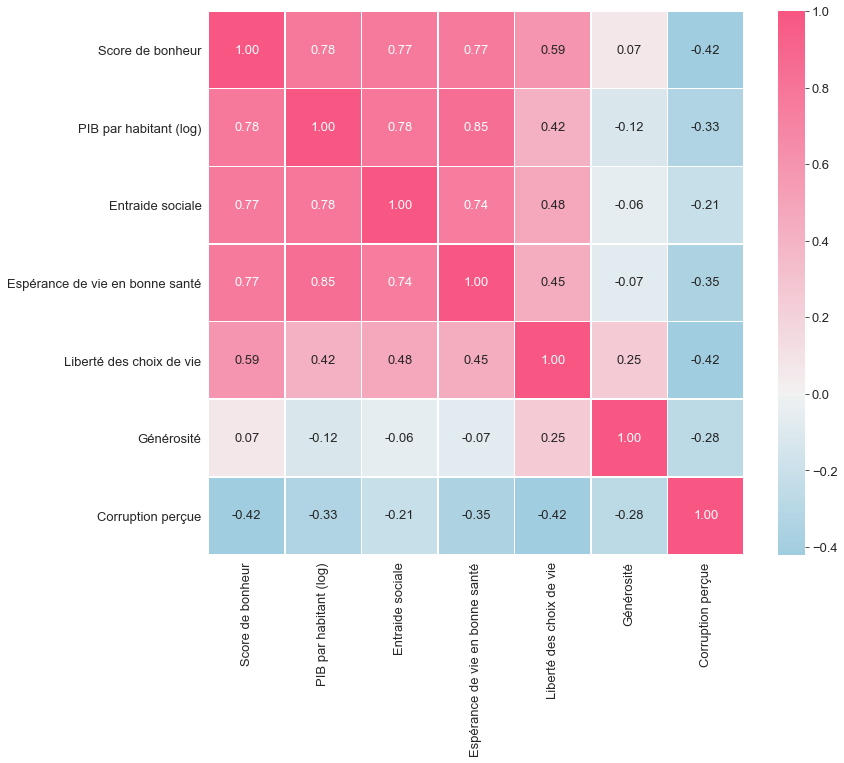

In [25]:
fig, ax = plt.subplots(figsize=(12,10))   
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True).reversed() # choix de la palette de couleurs
sns.heatmap(data_monde.iloc[:,1:].corr(), cmap=cmap, center=0, annot=True, fmt=".2f", linewidth = 0.5, ax=ax)

Citer les deux variables les moins corrélées entre elles (donner les noms exacts tels qu'ils apparaissent dans les donnés, attention à la casse). L'ordre des variables n'est pas important.

In [1]:
variable1 = "nom de la première variable"
variable2 = "nom de la deuxième variable"

In [2]:
# Cellule de vérification (ne pas modifier)
### BEGIN HIDDEN TESTS
assert variable1 == "Générosité" or variable1 == "Entraide sociale"
if variable1 == "Générosité" :
    assert variable2 == "Entraide sociale"
else :
    assert variable2 == "Générosité"
### END HIDDEN TESTS